In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os, csv
from requests import get
from io import StringIO

In [2]:
data_path = "data"
api_url="https://api.coronavirus.data.gov.uk/v2/data?areaType=ltla&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv"
frame_margins = [133000,658000,10600,655000]

# Get Local Authority Map Data

In [3]:
oa_map_filename = "zip://" + data_path + os.path.sep + "Output_Areas__December_2011__Population_Weighted_Centroids-shp.zip"
xref_sheet_filename = data_path + os.path.sep + "Output_Area_to_Ward_to_Local_Authority_District_(December_2019)_Lookup_in_England_and_Wales.csv"

In [4]:
oa = gpd.read_file(oa_map_filename)

In [5]:
xr = pd.read_csv(xref_sheet_filename)

In [6]:
lad = pd.merge(oa, xr, on=['OA11CD'], how='outer').groupby('LAD19CD').agg(lambda x: x.tolist())

In [7]:
lad.head()

,OBJECTID,OA11CD,geometry,FID,WD19CD,WD19NM,LAD19NM
LAD19CD,,,,,,,
E06000001,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[E00060316, E00060397, E00060317, E00060396, E...","[POINT (447147.362 534895.981000001), POINT (4...","[217, 380, 170, 381, 330, 183, 382, 218, 383, ...","[E05008946, E05008952, E05008949, E05008952, E...","[Hart, Victoria, Manor House, Victoria, De Bru...","[Hartlepool, Hartlepool, Hartlepool, Hartlepoo..."
E06000002,"[314, 315, 316, 317, 318, 319, 320, 321, 322, ...","[E00060977, E00060766, E00060587, E00060586, E...","[POINT (452494 518823), POINT (447431.295 5169...","[270, 101, 102, 103, 104, 473, 105, 474, 551, ...","[E05009856, E05009854, E05009854, E05009854, E...","[Brambles & Thorntree, Ayresome, Ayresome, Ayr...","[Middlesbrough, Middlesbrough, Middlesbrough, ..."
E06000003,"[613, 614, 615, 616, 617, 618, 619, 620, 621, ...","[E00061288, E00061126, E00061076, E00061127, E...","[POINT (453776.548 516554.062000001), POINT (4...","[889, 950, 1178, 951, 1179, 952, 1180, 953, 11...","[E05012451, E05012443, E05012441, E05012443, E...","[Ormesby, Guisborough, Eston, Guisborough, Est...","[Redcar and Cleveland, Redcar and Cleveland, R..."
E06000004,"[1254, 1255, 1256, 1257, 1258, 1293, 1294, 129...","[E00061860, E00061536, E00062036, E00061537, E...","[POINT (444253 519575), POINT (442053.897 5135...","[1780, 1374, 1708, 1375, 1783, 1376, 1788, 179...","[E05001549, E05001533, E05001552, E05001533, E...","[Stockton Town Centre, Eaglescliffe, Yarm, Eag...","[Stockton-on-Tees, Stockton-on-Tees, Stockton-..."
E06000005,"[579, 580, 581, 582, 583, 584, 585, 586, 587, ...","[E00174196, E00062176, E00062060, E00062282, E...","[POINT (431033.338 513303.311000001), POINT (4...","[1870, 2126, 2114, 2303, 1874, 2127, 2178, 181...","[E05010416, E05010431, E05010430, E05010422, E...","[Eastbourne, Whinfield, Stephenson, Mowden, Ea...","[Darlington, Darlington, Darlington, Darlingto..."


# Get Covid data from API

In [8]:
def get_data(url):
    print("Downloading data from URL " + url)
    response = get(url,timeout=10)
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: { response.text }')
    return response.text

In [9]:
data_string= get_data(api_url)
local_data=[]
data_reader = csv.reader(StringIO(data_string), delimiter=',')
for line in data_reader:
    local_data.append(line)
df = pd.DataFrame(local_data)

In [10]:
df.head()

,0,1,2,3,4,5
0,date,areaType,areaCode,areaName,newCasesBySpecimenDate,newDeaths28DaysByDeathDate
1,2021-01-28,ltla,N09000001,Antrim and Newtownabbey,19,1
2,2021-01-27,ltla,N09000001,Antrim and Newtownabbey,53,0
3,2021-01-26,ltla,N09000001,Antrim and Newtownabbey,47,1
4,2021-01-25,ltla,N09000001,Antrim and Newtownabbey,40,2


# Read in UK maps

In [11]:
ltla_filename = "zip://" + data_path+os.path.sep + "Local_Authority_Districts__May_2020__UK_BUC-shp.zip"
print("Loading LTLA map file from " + ltla_filename)
eng_ltla_map = gpd.read_file(ltla_filename,rows=314)
scot_ltla_map = gpd.read_file(ltla_filename,rows=slice(326,357))
wales_ltla_map = gpd.read_file(ltla_filename,rows=slice(357,379))

Loading LTLA map file from zip://data/Local_Authority_Districts__May_2020__UK_BUC-shp.zip


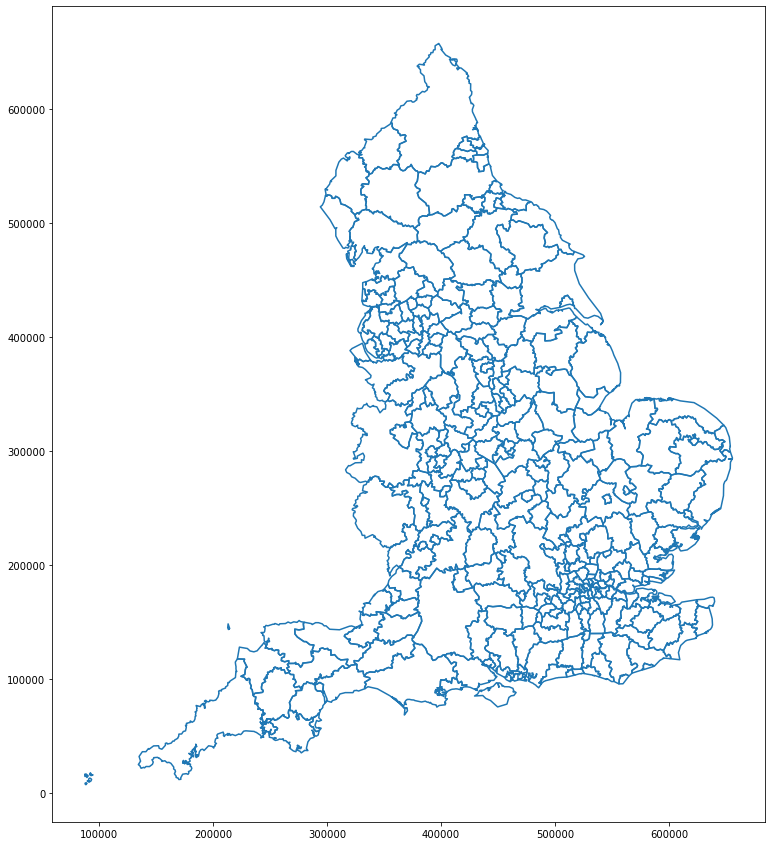

In [15]:
f, ax = plt.subplots(1, figsize=(15, 15))
ax = eng_ltla_map.boundary.plot(ax=ax)
#plt.axis('off')
plt.show()